In [ ]:
%pip install -q kaggle

# Cukup run sekali setelah itu dicomment saja

# Prediksi Harga GPU Berbasis Spesifikasi dan Analisis Faktor Penentu Harga Menggunakan Machine Learning

### Business Problem

Dalam beberapa tahun terakhir, pasar GPU mengalami dinamika harga yang sangat tidak stabil. Setelah periode lonjakan harga yang signifikan akibat maraknya oknum yang melakukan aktivitas cryptocurrency mining, pasar GPU kini memasuki fase pemulihan. Meskipun tekanan dari mining coin mulai menurun, harga GPU belum sepenuhnya kembali ke kondisi normal dan masih menunjukkan variasi yang besar antar produk dan generasi.

Di sisi lain, munculnya gelombang Artificial Intelligence (AI) dan kebutuhan komputasi tinggi untuk machine learning dan data center menciptakan potensi fenomena AI bubble yang berpotensi kembali mendorong kenaikan harga GPU, termasuk pada segmen budget dan performa tinggi. Hal ini tentu menjadi suatu kabar buruk untuk para konsumen terutama para gamers.

Dalam kondisi pasar yang dipengaruhi oleh siklus mining, tren AI, dan perkembangan teknologi hardware, konsumen maupun pelaku industri menghadapi kesulitan dalam memahami faktor apa saja yang sebenarnya paling berpengaruh terhadap harga GPU. Ketidakjelasan ini menyulitkan konsumen dalam menilai harga wajar GPU berdasarkan spesifikasinya. Hal ini juga dapat menghambat pelaku industri dalam melakukan analisis harga berbasis data.

###Tujuan Prediksi

- Membangun model machine learning untuk memprediksi harga retail GPU berdasarkan spesifikasi teknisnya.

- Mengidentifikasi faktor spesifikasi yang paling berpengaruh terhadap harga GPU menggunakan analisis feature importance.

- Mengevaluasi apakah faktor makro seperti harga RAM memiliki kontribusi tambahan dalam menjelaskan variasi harga GPU di tengah dinamika pasar yang dipengaruhi oleh permintaan gila gilaan terhadap RAM untuk membangun AI Data Center.

Catatan: Model yang dikembangkan berfokus pada prediksi berbasis spesifikasi dan bukan sebagai model forecasting harga di masa depan.

## 0. Import Library

In [6]:
import os
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

### Dataset Download (Kaggle API)

Notebook ini menggunakan Kaggle API untuk mengunduh dataset. Silakan buat kaggle.json masing-masing melalui akun Kaggle Anda (Account -> API -> Create Legacy API Key), lalu upload file tersebut ke environment sebelum menjalankan cell download.

Jika ingin download dataset secara manual maka bisa skip step ini dan commment cell di bawah

In [7]:
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

'mv' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


## 1. Load Dataset

In [8]:
# Load RAM Dataset

# Saya memilih dataset ini di luar kaggle karena dataset RAM Prices yang ada di kaggle hanya sampai 2015, sedangkan datasseet yang ada di humanprogress.org sampai 2024
# dan menurut saya lebih efektif untuk mengambil dataset dari website ini dibandingkan mengambil dataset dari kaggle lalu sisa datanya discraping

# Download dataset terlebih dahulu dari website ini
# https://humanprogress.org/dataset/computer-memory-price-per-megabyte?countries=Average+of+%24%2FMbyte+%28Y%29&primary-data=8377&compare=null&chart-type=Table&view=selected&value-type=score&calc-table-country-a=null&calc-table-country-b=null&x-axis-start=0&x-axis-end=10&y-axis-start=0.001555556&y-axis-end=411041792&y-axis-log=false&x-axis-log=false&auto-scale=true&map-color=Monochromatic+Sky&region-calculation=Mean&start-date=1957&end-date=2024&the-year=2024&sort-bar-chart-ascending=true

# Atau dari link ini
# https://drive.google.com/file/d/1v7Ed8BtAjKIDv74aJIVF9Ccck7fJahS9/view?usp=sharing

# Kemudian upload ke environment sebelum menjalankan cell

ram_raw = pd.read_csv("Human-Progress-Computer-memory-price-per-megabyte.csv")
print("Raw RAM shape:", ram_raw.shape)
print("Dataset masih dalam format wide (menyamping)")
ram_raw

Raw RAM shape: (1, 69)
Dataset masih dalam format wide (menyamping)


,,1957,1958,1959,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Average of $/Mbyte (Y),411041792,239494758.5*,67947725,5242880,NaN,NaN,NaN,3162505.6*,2642412,...,0.00522,0.003467,0.005925,0.006122,0.003383,0.003058,0.003413,0.002555,0.001556,0.001586


In [9]:
# Load GPU Dataset

!kaggle datasets download -d mannacharya/historical-gpu-prices-nvidia-and-amd
!unzip -o historical-gpu-prices-nvidia-and-amd.zip

# Jika ingin download dataset secara manual bisa melalui link ini (terdapat 2 file gpu_metadata.csv dan gpu_price_history.csv)
# https://www.kaggle.com/datasets/mannacharya/historical-gpu-prices-nvidia-and-amd

Traceback (most recent call last):
  File "c:\Users\Marcell\anaconda3\envs\deep_learning\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Marcell\anaconda3\envs\deep_learning\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\Marcell\anaconda3\envs\deep_learning\Scripts\kaggle.exe\__main__.py", line 7, in <module>
  File "c:\Users\Marcell\anaconda3\envs\deep_learning\lib\site-packages\kaggle\cli.py", line 68, in main
    out = args.func(**command_args)
  File "c:\Users\Marcell\anaconda3\envs\deep_learning\lib\site-packages\kaggle\api\kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
  File "c:\Users\Marcell\anaconda3\envs\deep_learning\lib\site-packages\kaggle\api\kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
KeyError: 'username'
'unzip' is not recognized as an internal or external

In [10]:
meta = pd.read_csv("gpu_metadata.csv")
price = pd.read_csv("gpu_price_history.csv")

print(meta.shape, price.shape)

(48, 4) (1087, 4)


In [11]:
meta.head()

,Name,Wattage,VRAM,3DMARK
0,GeForce GTX 1050,75W,2GB,1861
1,GeForce GTX 1050 Ti,75W,4GB,2356
2,GeForce GTX 1060,120W,6GB,4215
3,GeForce GTX 1650,75W,4GB,3552
4,GeForce GTX 1660 SUPER,125W,6GB,6078


In [12]:
price.head()

,Date,Name,Retail Price,Used Price
0,01-01-24,GeForce GTX 1050,0,0
1,01-02-24,GeForce GTX 1050,0,0
2,01-03-23,GeForce GTX 1050,192,61
3,01-03-24,GeForce GTX 1050,254,52
4,01-04-23,GeForce GTX 1050,181,55


## 2. Preprocessing

a. Preprocessing Data RAM

In [13]:
# Transposing (wide -> long)
ram_long = ram_raw.set_index(ram_raw.columns[0]).T
ram_long = ram_long.reset_index()

ram_long.columns = ["year", "ram_price_per_mb"]

ram_long["year"] = ram_long["year"].astype(int)

ram_long["ram_price_per_mb"] = pd.to_numeric(
    ram_long["ram_price_per_mb"], errors="coerce"
)

print("RAM long format shape:", ram_long.shape)

# Filter tahun modern (efektif 2010 - 2024)
ram_long = ram_long[ram_long["year"] >= 2010].reset_index(drop=True)

print("RAM after year filter:", ram_long.shape)

# Handle missing/outlier
ram_long = ram_long.dropna()

# Save dataset yang sudah dibersihkan dalam bentuk .csv
ram_long.to_csv("ram_price_clean.csv", index=False)
print("Saved as ram_price_clean.csv")

ram_long


RAM long format shape: (68, 2)
RAM after year filter: (15, 2)
Saved as ram_price_clean.csv


,year,ram_price_per_mb
0,2010,0.018867
1,2011,0.008217
2,2012,0.004600
3,2013,0.006767
4,2014,0.008300
5,2015,0.005220
6,2016,0.003467
7,2017,0.005925
8,2018,0.006122
9,2019,0.003383


Kesimpulan

- Dataset RAM yang awalnya berbentuk horizontal (feature dalam bentuk kolom) ditransformasikan ke format long (vertikal) agar feature menjadi dalam bentuk row.

- Kolom tahun dan harga RAM distandarkan serta dikonversi ke tipe numerik untuk memastikan kompatibilitas dengan proses penggabungan dan pemodelan.

- Data difilter pada rentang tahun 2010-2024 untuk merepresentasikan kondisi pasar modern yang lebih relevan dengan data GPU modern.

- Baris dengan nilai null (NaN) dihapus untuk menghindari bias dalam analisis.

- Dataset RAM yang telah diproses disimpan dalam format CSV sebagai backup agar dapat dipakai kembali.

b. Preprocessing Data GPU

In [14]:
# Samakan format nama kolom: huruf kecil dan ganti spasi dengan underscore
meta.columns = meta.columns.str.lower().str.replace(" ", "_")
price.columns = price.columns.str.lower().str.replace(" ", "_")

def clean_gpu_name(text):
    # Jika nilai kosong, kembalikan None
    if pd.isna(text):
        return None
    text = text.lower() # Ubah ke huruf kecil
    text = re.sub(r'\(.*?\)', '', text)  # Hapus teks di dalam tanda kurung (contoh: "(Founders Edition)")
    text = re.sub(r'[^a-z0-9 ]', '', text) # Hapus karakter selain huruf, angka, dan spasi
    return re.sub(r'\s+', ' ', text).strip() # Rapikan spasi berlebih

# Membuat kolom nama yang sudah bersih
meta["gpu_name_clean"] = meta["name"].apply(clean_gpu_name)
price["gpu_name_clean"] = price["name"].apply(clean_gpu_name)

# Ekstrak angka dari kolom VRAM (misal: "8 GB" -> 8) dan ubah ke float
meta["vram"] = (
    meta["vram"]
    .astype(str)
    .str.extract(r'(\d+)')
    .astype(float)
)

# Ekstrak angka dari kolom wattage (misal: "320W" -> 320) dan ubah ke float
meta["wattage"] = (
    meta["wattage"]
    .astype(str)
    .str.extract(r'(\d+)')
    .astype(float)
)

# Memastikan kolom 3DMARK bertipe numerik, nilai tidak valid dijadikan NaN
meta["3dmark"] = pd.to_numeric(meta["3dmark"], errors="coerce")

# Membersihkan harga dari simbol mata uang dan karakter non-numerik
def clean_price(x):
    if pd.isna(x):
        return np.nan
    return float(re.sub(r"[^\d.]", "", str(x)))

# Pembersihan harga retail dan harga second
price["retail_price"] = price["retail_price"].apply(clean_price)
price["used_price"] = price["used_price"].apply(clean_price)

price["date"] = pd.to_datetime(price["date"], errors="coerce") # Konversi kolom tanggal menjadi dalam format datetime
price["year"] = price["date"].dt.year # Ekstrak tahun dari tanggal

# Gabungkan dataset harga dan metadata GPU berdasarkan nama GPU yang sudah dibersihkan
gpu_merged = pd.merge(
    price,
    meta,
    on="gpu_name_clean",
    how="left",
    suffixes=("_price", "_meta")
)

gpu_merged["date"] = pd.to_datetime(gpu_merged["date"], errors="coerce") # Pastikan kolom date bertipe datetime setelah merge
gpu_merged["year"] = gpu_merged["date"].dt.year # Ekstrak ulang tahun dari kolom date
gpu_merged = gpu_merged.drop(columns=["date"]) # Hapus kolom date karena sudah direpresentasikan oleh year

# Pindahkan kolom gpu_name_clean ke posisi paling kiri
cols = ["gpu_name_clean"] + [c for c in gpu_merged.columns if c != "gpu_name_clean"]
gpu_merged = gpu_merged[cols]

# Pindahkan kolom year ke posisi paling kiri
cols = ["year"] + [c for c in gpu_merged.columns if c != "year"]
gpu_merged = gpu_merged[cols]

# Hapus kolom nama GPU asli yang tidak lagi diperlukan
gpu_merged = gpu_merged.drop(columns=["name_price"])
gpu_merged = gpu_merged.drop(columns=["name_meta"])

gpu_merged = gpu_merged.sort_values(by="year") # Urutkan data berdasarkan tahun rilis

print("Merged shape:", gpu_merged.shape)
gpu_merged.to_csv("gpu_merged.csv", index=False)
print("Sorted by year")
gpu_merged

Merged shape: (1087, 7)
Sorted by year


C:\Users\Marcell\AppData\Local\Temp\ipykernel_14172\731924382.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  price["date"] = pd.to_datetime(price["date"], errors="coerce") # Konversi kolom tanggal menjadi dalam format datetime


,year,gpu_name_clean,retail_price,used_price,wattage,vram,3dmark
936,2022,radeon rx 6800 xt,814.0,489.0,300.0,16.0,19187
93,2022,geforce gtx 1650,132.0,105.0,75.0,4.0,3552
90,2022,geforce gtx 1650,139.0,198.0,75.0,4.0,3552
405,2022,geforce rtx 3090,1490.0,797.0,350.0,24.0,19901
246,2022,geforce rtx 3060,367.0,255.0,170.0,12.0,8739
...,...,...,...,...,...,...,...
503,2024,geforce rtx 4070 ti super,782.0,0.0,285.0,16.0,24426
504,2024,geforce rtx 4070 ti super,799.0,0.0,285.0,16.0,24426
505,2024,geforce rtx 4070 ti super,807.0,749.0,285.0,16.0,24426
490,2024,geforce rtx 4070 ti,769.0,582.0,285.0,12.0,22706


Kesimpulan

- Dilakukan untuk menyamakan format penamaan antar dataset harga dan spesifikasi, sehingga proses penggabungan data dapat berjalan secara akurat.

- Dataset harga dan spesifikasi digabung berdasarkan nama GPU yang telah dibersihkan untuk menyatukan informasi harga, performa, dan spesifikasi teknis.

- Informasi VRAM, wattage, dan skor 3DMARK diekstraksi dan dikonversi ke tipe numerik agar dapat digunakan sebagai fitur input pada model machine learning (seperti menghilangkan GB pada VRAM, W pada wattage).

- Nilai harga dibersihkan dari simbol non-numerik dan nilai tidak valid (seperti harga nol) untuk menghindari bias dan error dalam pelatihan model.

- Data tanggal diolah menjadi variabel tahun untuk mempermudah representasi konteks waktu pasar (dari 01-01-24 menjadi 2024).

- Dataset akhir disusun ulang dan disort berdasarkan tahun agar mudah dianalisis.

## 3. EDA

Pada tahap Exploratory Data Analysis (EDA), dilakukan analisis awal untuk memahami karakteristik data GPU yang digunakan, mengidentifikasi pola, serta menggali hubungan antara spesifikasi GPU dengan harga retail. Tahap ini bertujuan untuk memberikan insight awal yang akan menjadi dasar dalam pemilihan fitur dan metode pemodelan.

In [15]:
# Redeclared df
df = gpu_merged

# Ceking apabila ada NaN values
df.info()
df.isna().sum()
df.describe()
(df == 0).sum()

<class 'pandas.core.frame.DataFrame'>
Index: 1087 entries, 936 to 1086
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            1087 non-null   int32  
 1   gpu_name_clean  1087 non-null   object 
 2   retail_price    1087 non-null   float64
 3   used_price      1087 non-null   float64
 4   wattage         1087 non-null   float64
 5   vram            1087 non-null   float64
 6   3dmark          1087 non-null   int64  
dtypes: float64(4), int32(1), int64(1), object(1)
memory usage: 63.7+ KB


year               0
gpu_name_clean     0
retail_price      62
used_price        52
wattage            0
vram               0
3dmark             0
dtype: int64

Insight: Terlihat bahwa tidak ada NaN values, namun terdapat 62 dan 52 cell dengan value 0, sehingga perlu dihapus

In [16]:
# Hapus 0 values
df = df[df["retail_price"] > 0]
df.loc[df["used_price"] == 0, "used_price"] = None

In [17]:
# Cek kembali
df.info()
df.isna().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1025 entries, 936 to 1086
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            1025 non-null   int32  
 1   gpu_name_clean  1025 non-null   object 
 2   retail_price    1025 non-null   float64
 3   used_price      1005 non-null   float64
 4   wattage         1025 non-null   float64
 5   vram            1025 non-null   float64
 6   3dmark          1025 non-null   int64  
dtypes: float64(4), int32(1), int64(1), object(1)
memory usage: 60.1+ KB


,year,retail_price,used_price,wattage,vram,3dmark
count,1025.000000,1025.000000,1005.000000,1025.000000,1025.000000,1025.000000
mean,2023.475122,507.211707,333.225871,203.391220,10.210732,12511.458537
std,0.590960,407.572390,307.335480,95.136231,5.720755,8302.982417
min,2022.000000,75.000000,49.000000,50.000000,2.000000,1195.000000
25%,2023.000000,225.000000,110.000000,125.000000,6.000000,6078.000000
50%,2024.000000,366.000000,253.000000,190.000000,8.000000,11744.000000
75%,2024.000000,679.000000,448.000000,285.000000,12.000000,19187.000000
max,2024.000000,2229.000000,2119.000000,450.000000,24.000000,35966.000000


### Plotting

In [18]:
# Simpel analisis dari tabel dataset

df.sort_values("retail_price", ascending=False)[
    ["gpu_name_clean", "year", "retail_price", "vram", "3dmark"]
].head(10)

,gpu_name_clean,year,retail_price,vram,3dmark
549,geforce rtx 4090,2024,2229.0,24.0,35966
387,geforce rtx 3090,2024,2100.0,24.0,19901
547,geforce rtx 4090,2022,2079.0,24.0,35966
407,geforce rtx 3090,2024,2070.0,24.0,19901
546,geforce rtx 4090,2024,2053.0,24.0,35966
548,geforce rtx 4090,2023,2049.0,24.0,35966
401,geforce rtx 3090,2024,2026.0,24.0,19901
525,geforce rtx 4090,2023,1998.0,24.0,35966
385,geforce rtx 3090,2024,1982.0,24.0,19901
397,geforce rtx 3090,2024,1978.0,24.0,19901


Insight:

GPU dengan harga tertinggi didominasi oleh high-end models dengan VRAM dan performance score tinggi.

c:\Users\Marcell\anaconda3\envs\deep_learning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


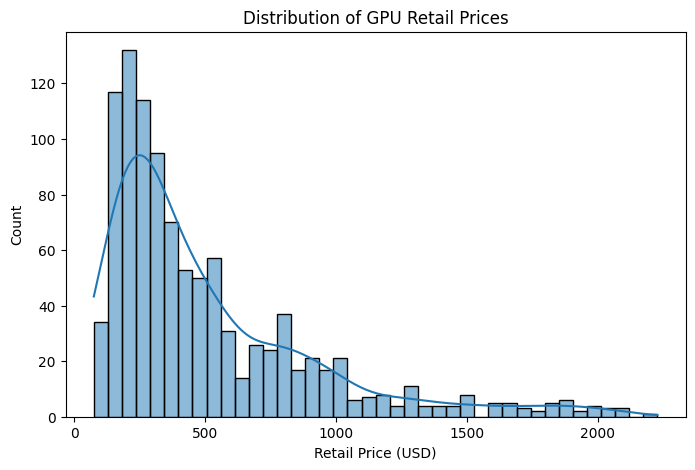

In [19]:
# Distribusi Harga GPU

plt.figure(figsize=(8,5))
sns.histplot(df["retail_price"], bins=40, kde=True)
plt.title("Distribution of GPU Retail Prices")
plt.xlabel("Retail Price (USD)")
plt.ylabel("Count")
plt.show()

Insight:

Analisis distribusi harga dilakukan untuk melihat sebaran harga GPU di dalam dataset. Hasil visualisasi menunjukkan bahwa distribusi harga cenderung right-skewed, di mana sebagian besar GPU yang memiliki penjualan lebih laku berada pada rentang harga menengah, sementara GPU high-end cenderung menyasar segmen niche dengan volume penjualan lebih kecil.

Hal ini mengindikasikan adanya segmentasi pasar GPU berdasarkan kelas performa, sehingga model perlu mampu menangkap perbedaan antara GPU entry-level dan high-end.

Karena distribusi data didominasi oleh GPU kelas budget, model cenderung lebih akurat dalam memprediksi harga GPU pada rentang harga rendah hingga menengah. Sebaliknya, prediksi untuk GPU kelas high-end berpotensi memiliki error yang lebih besar akibat keterbatasan jumlah data pada segmen tersebut.

c:\Users\Marcell\anaconda3\envs\deep_learning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Marcell\anaconda3\envs\deep_learning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


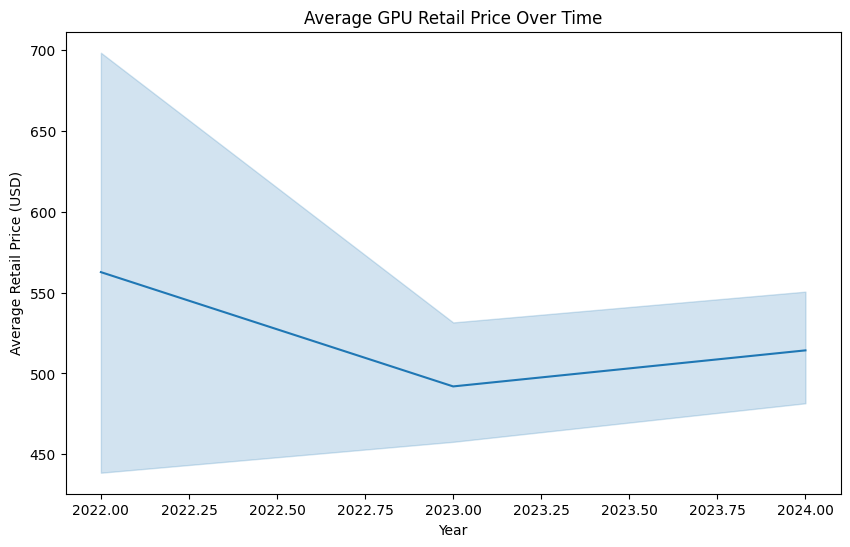

In [20]:
# Harga GPU vs Waktu

plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="year", y="retail_price", estimator="mean")
plt.title("Average GPU Retail Price Over Time")
plt.ylabel("Average Retail Price (USD)")
plt.xlabel("Year")
plt.show()

Insight:

Analisis tren harga berdasarkan tahun rilis dilakukan untuk mengamati perubahan harga GPU dari waktu ke waktu. Hasil analisis menunjukkan bahwa harga GPU sempat mengalami penurunan setelah berakhirnya era cryptocurrency mining. Namun, tren tersebut berbalik pada sekitar tahun 2023, di mana harga GPU kembali mengalami kenaikan.

Kenaikan harga pasca-2023 ini diduga berkaitan dengan meningkatnya permintaan GPU untuk kebutuhan Artificial Intelligence (AI), machine learning, dan data center yang kembali memberikan tekanan pada pasar GPU, khususnya pada segmen budget hingga tinggi, sebab manufaktur GPU sudah tidak lagi produksi GPU untuk kalangan gamers tetapi juga untuk kebutuhan industri AI.

Harga GPU tidak hanya dipengaruhi oleh siklus teknologi internal, tetapi juga sangat sensitif terhadap perubahan demand eksternal seperti tren cryptocurrency mining dan AI. Hal ini menunjukkan bahwa faktor waktu [year] memiliki peran penting sebagai konteks pasar dalam prediksi harga GPU.

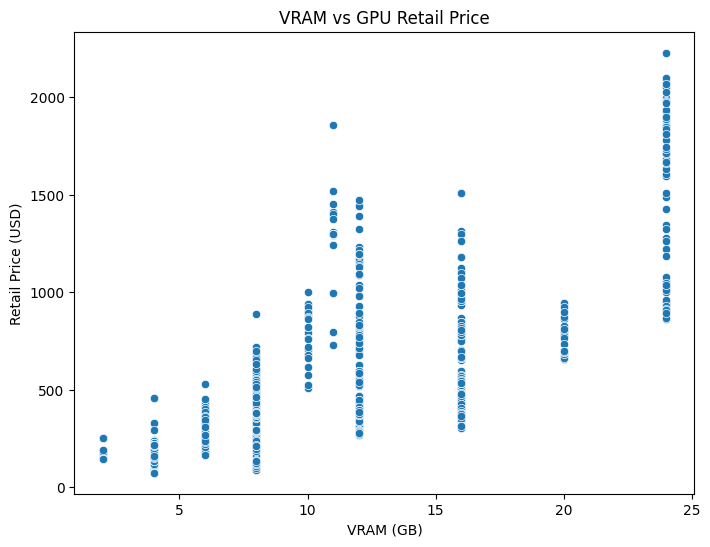

In [21]:
# VRAM vs Harga GPU

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="vram", y="retail_price")
plt.title("VRAM vs GPU Retail Price")
plt.xlabel("VRAM (GB)")
plt.ylabel("Retail Price (USD)")
plt.show()

Insight:

Visualisasi hubungan antara kapasitas VRAM dan harga retail GPU menunjukkan adanya korelasi positif: secara umum, GPU dengan kapasitas VRAM yang lebih besar cenderung memiliki harga yang lebih tinggi. GPU dengan VRAM rendah (2-6 GB) mayoritas berada pada rentang harga budget, (8-12 GB) berada pada rentang harga mid range, sementara GPU dengan VRAM besar (16-24 GB) terkonsentrasi pada segmen high-end.

Namun, terlihat pula bahwa untuk nilai VRAM yang sama, terdapat variasi harga berbeda. Seperti GPU VRAM 12 GB memiliki harga termurah di kisaran USD 250 tetapi di saat yang bersamaan terdapat unit GPU lain dengan VRAM 12 GB dengan harga yang jauh lebih mahal.

Terdapat juga suatu temuan yang menarik adalah bahwa kapasitas VRAM yang berbeda, bisa aja memiliki range harga yang kurang lebih sama. Sebagai contoh, GPU dengan VRAM 12 GB atau 16 GB dapat memiliki range harga yang sama padahal memiliki kapasitas VRAM yang berbeda.

Kedua hal ini mengindikasikan bahwa VRAM bukan satu-satunya faktor penentu harga, dan perlu dikombinasikan dengan feature (spesifikasi) lain seperti performa 3DMARK, wattage, dan tahun rilis.

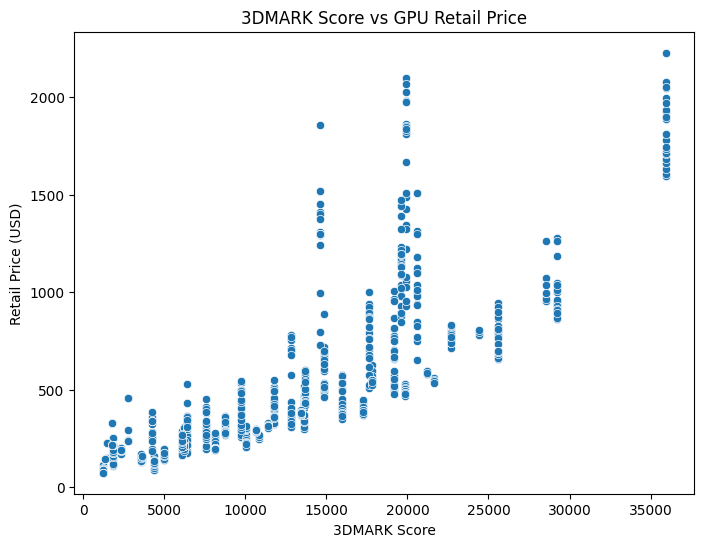

In [22]:
# Performa (3DMARK) vs Harga

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="3dmark", y="retail_price")
plt.title("3DMARK Score vs GPU Retail Price")
plt.xlabel("3DMARK Score")
plt.ylabel("Retail Price (USD)")
plt.show()

Insight:

Visualisasi hubungan antara 3DMARK score dan harga retail GPU menunjukkan korelasi yang mirip dengan visualisasi VRAM, secara umum, semakin kencang komputasinya harga lebih tinggi. Namun bedanya 3DMARK memiliki skor yang lebih variatif dibanding VRAM, ini menunjukkan bahwa performa yang diukur melalui benchmark lebih representatif terhadap nilai pasar GPU. Meskipun masih terdapat variasi harga, pola kenaikan harga seiring meningkatnya skor 3DMARK terlihat lebih konsisten dan stabil.

3DMARK score memiliki daya explanatory power yang tinggi terhadap harga GPU karena secara langsung merepresentasikan performa nyata GPU dalam berbagai skenario penggunaan. Oleh karena itu, variabel ini diperkirakan menjadi salah satu fitur paling dominan dalam model prediksi harga GPU.

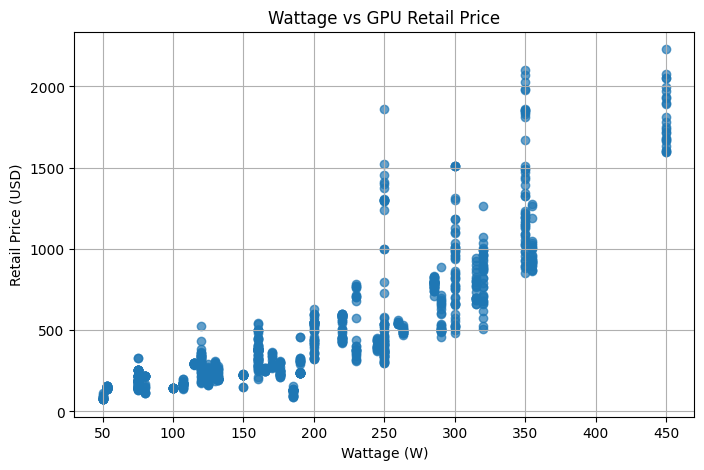

In [23]:
# Performa Wattage vs Harga

plt.figure(figsize=(8, 5))
plt.scatter(df["wattage"], df["retail_price"], alpha=0.7)
plt.xlabel("Wattage (W)")
plt.ylabel("Retail Price (USD)")
plt.title("Wattage vs GPU Retail Price")
plt.grid(True)
plt.show()

Insight:

Visualisasi hubungan antara wattage dan harga retail GPU sama seperti kedua feature sebelumnya yaitu korelasi positif yang kuat, di mana GPU dengan konsumsi daya yang lebih tinggi cenderung memiliki harga yang lebih mahal.

Terlihat pula bahwa kenaikan harga GPU menjadi lebih signifikan pada rentang wattage 250 W. Hal ini mengindikasikan bahwa GPU dengan daya 250 W pernah menjadi high-end pada masanya.

Di sini wattage berperan sebagai indikator tidak langsung dari kelas performa GPU. Semakin tinggi konsumsi daya, semakin besar pula potensi performa dan harga GPU, meskipun variasi harga masih dipengaruhi oleh faktor lain seperti skor 3DMARK dan tahun rilis produk.

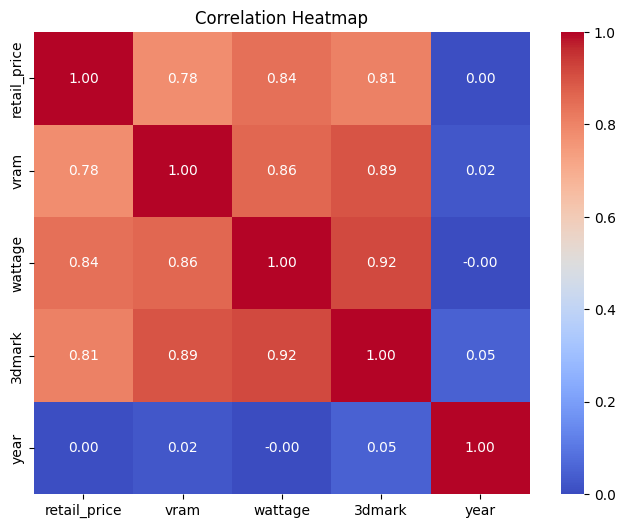

In [24]:
# Korelasi Antar Fitur

plt.figure(figsize=(8,6))
corr = df[["retail_price", "vram", "wattage", "3dmark", "year"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Insight:

Correlation heatmap menunjukkan hubungan linear antara harga retail GPU dan berbagai fitur spesifikasi. Terlihat bahwa retail_price memiliki korelasi positif yang kuat dengan variabel teknis utama, yaitu wattage (0.84), 3dmark (0.81), dan vram (0.78). Hal ini mengindikasikan bahwa GPU dengan performa lebih tinggi, kapasitas memori lebih besar, dan konsumsi daya yang lebih tinggi cenderung memiliki harga yang lebih mahal. Dan ternyata wattage di sini terlihat sebagai feature standalone sebagai yang paling berpengaruh terhadap harga GPU.

Selain itu, terlihat korelasi yang sangat tinggi antar fitur spesifikasi itu sendiri, khususnya antara 3dmark dan wattage (0.92) serta antara 3dmark dan vram (0.89). Korelasi ini menunjukkan bahwa fitur-fitur tersebut saling berkaitan dan secara kolektif merepresentasikan kelas performa GPU.

Sebaliknya, variabel year menunjukkan korelasi yang sangat rendah terhadap harga retail maupun fitur lainnya. Hal ini mengindikasikan bahwa hubungan antara tahun rilis dan harga GPU tidak bersifat linear, serta kemungkinan dipengaruhi oleh faktor eksternal seperti siklus pasar, efek pasca-mining, dan lonjakan permintaan AI.

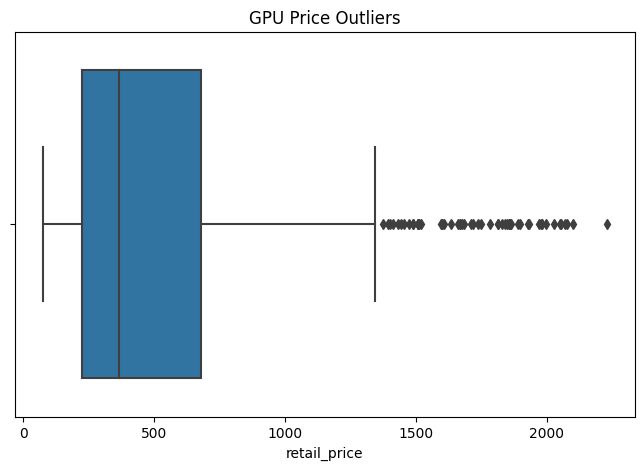

In [25]:
# GPU Price Outliers

plt.figure(figsize=(8,5))
sns.boxplot(x=df["retail_price"])
plt.title("GPU Price Outliers")
plt.show()

Insight:

Boxplot retail_price menunjukkan adanya sejumlah outlier pada sisi harga tinggi, yang merepresentasikan GPU kelas high-end dengan harga jauh di atas mayoritas data. Sebagian besar GPU terkonsentrasi pada rentang harga rendah hingga menengah, sementara GPU dengan harga sangat tinggi muncul sebagai titik-titik terpisah di atas whisker.

Keberadaan outlier ini bukan suatu kesalahan data, melainkan menjelaskan segmentasi pasar GPU, di mana produk high-end memiliki harga yang secara alami jauh lebih mahal dibandingkan GPU kelas budget atau mid-range.

Outlier harga GPU mencerminkan perbedaan kelas produk dan bukan anomali yang perlu dihapus. Menghilangkan outlier tersebut berpotensi menghilangkan informasi penting terkait GPU performa tinggi.

## 4. Training, Modelling & Evaluating

Berdasarkan hasil Exploratory Data Analysis (EDA), setiap fitur yang digunakan dalam model menunjukkan karakteristik hubungan yang berbeda terhadap harga retail GPU. Analisis ini menjadi dasar dalam pemilihan algoritma dan model yang digunakan.

i. Year menunjukkan korelasi linear yang rendah terhadap harga GPU, namun memiliki pola tren yang dipengaruhi oleh kondisi pasar seperti pemulihan pasca cryptocurrency mining dan meningkatnya permintaan AI sejak sekitar tahun 2023. Hal ini menunjukkan bahwa year merepresentasikan konteks pasar yang dinamis dan non-linear, sehingga Random Forest lebih tepat digunakan untuk menangkap pengaruhnya dibandingkan model linear.

ii. VRAM menunjukkan korelasi positif terhadap harga GPU, namun dengan variasi harga yang cukup besar pada nilai VRAM yang sama. Hal ini mengindikasikan bahwa hubungan antara VRAM dan harga tidak bersifat linear, melainkan dipengaruhi oleh faktor lain seperti performa dan segmentasi produk. Oleh karena itu, model non-linear seperti Random Forest lebih sesuai untuk menangkap hubungan tersebut dibandingkan model linear.

iii. 3DMARK score menunjukkan hubungan yang paling kuat dan konsisten dengan harga GPU. Variasi harga pada skor performa yang sama relatif lebih kecil, sehingga pola hubungan mendekati linear. Kondisi ini menjadikan Linear Regression relevan sebagai baseline model. Namun, untuk menangkap kemungkinan kenaikan harga yang lebih tajam pada skor performa tinggi, Random Forest tetap digunakan sebagai model utama.

iv. Wattage menunjukkan korelasi positif dengan harga GPU, di mana kenaikan harga menjadi lebih signifikan pada rentang wattage tinggi. Sama seperti 3DMARk, feature ini bisa menjadikan Linear Regression sebagai baseline model. Namun Random Forest tetap dipilih sebagai model utama karena mampu menangkap hubungan non-linear dan interaksi antara wattage dengan fitur performa lainnya.

Sedangkan untuk mengevaluasi performa model prediksi harga GPU, digunakan 3 metric evaluasi utama, yaitu MAE, RMSE, dan R2, karena masing-masing metric memberikan perspektif yang berbeda dan saling melengkapi.

MAE digunakan untuk mengukur rata-rata kesalahan prediksi dalam satuan harga yang mudah diinterpretasikan.

RMSE dipilih karena memberikan penalti lebih besar terhadap kesalahan prediksi yang ekstrem, sehingga lebih sesuai untuk data harga GPU yang memiliki variasi besar dan mengandung outlier.

R2 digunakan untuk menilai sejauh mana variasi harga GPU dapat dijelaskan oleh fitur-fitur dalam model, sehingga memberikan gambaran kemampuan model secara keseluruhan.

Catatan:

MSE tidak digunakan sebagai metric utama karena nilainya masih dalam satuan kuadrat harga, sehingga sulit diinterpretasikan secara praktis (tidak merepresentasikan error dalam satuan harga GPU). RMSE lebih dipilih karena merupakan akar dari MSE, sehingga mudah dipahami dan tetap sensitif terhadap error besar, yang lebih relevan untuk data harga GPU dengan variasi tinggi.

### 4.1 Kesimpulan Pemilihan Model

Kesimpulan pemilihan model adalah dengan menggunakan 2 pendekatan, yaitu Linear Regression dan Random Forest. Linear Regression digunakan sebagai baseline model untuk menangkap hubungan linear utama antara spesifikasi GPU dan harga, khususnya pada fitur performa seperti 3DMARK score dan Wattage. Sementara itu, Random Forest dipilih sebagai model utama karena mampu menangkap hubungan non-linear, interaksi antar fitur, serta variasi harga yang berbeda pada segmen GPU performa tinggi.

### 4.2 Kesimpulan Pemilihan Metrics Evaluasi

- MAE digunakan untuk mengukur rata-rata kesalahan prediksi dalam satuan harga yang mudah dipahami
- RMSE dipilih karena lebih sensitif terhadap kesalahan besar yang umum terjadi pada GPU kelas high-end
- R2 digunakan untuk menilai seberapa baik model menjelaskan variasi harga GPU secara keseluruhan.

### Data Preparation

Dataset dibagi menjadi train set dan test set dengan rasio 80:20. Data latih digunakan untuk melatih model, sedangkan data uji digunakan untuk mengevaluasi performa model pada data yang belum pernah dilihat sebelumnya. Parameter random_state=42 digunakan untuk memastikan hasil pembagian data bersifat reproducible.

In [26]:
df = df[df["retail_price"] > 0].reset_index(drop=True)

# pemilihan feature numerik untuk baseline
features = ["year", "vram", "wattage", "3dmark"]
target = "retail_price"

model_df = df[features + [target]].dropna()
print(model_df.shape)
model_df.head()

# train test split
X = model_df[features]
y = model_df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

(1025, 5)


### a. Linear Regression

In [27]:
# Modeling
lr = LinearRegression()
# Training
lr.fit(X_train, y_train) # fit() digunakan untuk melatih model menggunakan data latih

LinearRegression()

In [28]:
# Evaluating
y_pred_lr = lr.predict(X_test) # predict() digunakan untuk menghasilkan prediksi pada data yang belum pernah dilihat model.

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr) ** 0.5
r2_lr = r2_score(y_test, y_pred_lr)

print("MAE Linear Regression:", mae_lr)
print("RMSE Linear Regression:", rmse_lr)
print("R2 Linear Regression:", r2_lr)

MAE Linear Regression: 175.37845612901594
RMSE Linear Regression: 242.99279379763357
R2 Linear Regression: 0.6750064924944065


In [29]:
# Feature Coefficient
coef_df = pd.DataFrame({
    "feature": features,
    "coefficient": lr.coef_
}).sort_values(by="coefficient", ascending=False)

coef_df

,feature,coefficient
1,vram,12.755692
2,wattage,2.473700
3,3dmark,0.005848
0,year,-1.438552


Coefficient Linear Regression menunjukkan bahwa VRAM, wattage, dan 3DMARK memiliki pengaruh positif terhadap harga GPU dan cenderung diikuti oleh kenaikan harga. Sebaliknya, variabel year memiliki koefisien negatif, yang mengindikasikan bahwa pada spesifikasi yang sama, GPU yang dirilis lebih baru cenderung memiliki harga relatif lebih rendah akibat efisiensi teknologi dan siklus produk. Interpretasi ini digunakan sebagai gambaran baseline, mengingat hubungan antar fitur dan harga GPU tidak sepenuhnya linear.

### Linear Regression (Standardized)

In [30]:
# Standarization
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Modeling
lr_std = LinearRegression()
# Training
lr_std.fit(X_train_scaled, y_train)

LinearRegression()

In [32]:
# Evaluating
y_pred_std = lr_std.predict(X_test_scaled)

mae_lr_std = mean_absolute_error(y_test, y_pred_std)
rmse_lr_std = mean_squared_error(y_test, y_pred_std) ** 0.5
r2_lr_std = r2_score(y_test, y_pred_std)

print("MAE Linear Regression (Standardized):", mae_lr_std)
print("RMSE Linear Regression (Standardized):", rmse_lr_std)
print("R2 Linear Regression (Standardized):", r2_lr_std)

MAE Linear Regression (Standardized): 175.3784561290161
RMSE Linear Regression (Standardized): 242.99279379763354
R2 Linear Regression (Standardized): 0.6750064924944066


In [33]:
# Feature Coefficient
coef_std = pd.DataFrame({
    "feature": features,
    "standardized_coefficient": lr_std.coef_
}).sort_values(by="standardized_coefficient", ascending=False)

coef_std

,feature,standardized_coefficient
2,wattage,235.080307
1,vram,72.172755
3,3dmark,48.061805
0,year,-0.855755


Setelah distandardized, urutan pengaruh fitur terhadap harga GPU tidak mengalami perubahan signifikan. Wattage tetap menjadi feature dengan pengaruh paling dominan, diikuti oleh VRAM dan 3DMARK, sementara year menunjukkan pengaruh negatif yang relatif lebih kecil.

Alasan dilakukan standardization untuk menegaskan bahwa konsumsi daya dan spesifikasi teknis GPU tetap menjadi faktor utama penentu harga, konsisten dengan temuan EDA dan model sebelumnya.

### b. Random Forest

In [34]:
# Modeling
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
# Training
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [35]:
# Evaluating
y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf) ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

print("MAE Random Forest:", mae_rf)
print("RMSE Random Forest:", rmse_rf)
print("R2 Random Forest:", r2_rf)

MAE Random Forest: 47.870404050644765
RMSE Random Forest: 100.38385767608042
R2 Random Forest: 0.9445354289111614


4.5. Feature Importance

In [36]:
imp_df = pd.DataFrame({
    "feature": features,
    "importance": rf.feature_importances_
}).sort_values(by="importance", ascending=False)

imp_df


,feature,importance
2,wattage,0.519240
3,3dmark,0.349022
1,vram,0.104161
0,year,0.027576


Hasil feature importance dari Random Forest kembali menegaskan bahwa wattage merupakan faktor paling dominan dalam menentukan harga GPU, diikuti oleh 3DMARK score yang merepresentasikan performa komputasi. VRAM memiliki pengaruh yang lebih kecil dibandingkan kedua fitur tersebut, sementara year memberikan kontribusi paling rendah terhadap prediksi harga.

Dengan model yang berbeda, temuan ini kembali mengindikasikan bahwa harga GPU lebih banyak ditentukan oleh kelas performa dan kebutuhan daya dibandingkan faktor waktu rilis, serta menegaskan kemampuan Random Forest dalam menangkap hubungan non-linear antar spesifikasi teknis GPU.

## 5. Cross Validation

Pada tahap ini, Cross Validation dilakukan untuk mengevaluasi stabilitas dan kemampuan generalisasi model. Berbeda dengan evaluasi menggunakan satu kali pembagian data latih dan data uji, cross validation memungkinkan model untuk dilatih dan diuji pada beberapa subset data yang berbeda, sehingga hasil evaluasi tidak bergantung pada satu pembagian data tertentu.

Dalam penelitian ini, digunakan pendekatan K-Fold Cross Validation, di mana dataset dibagi menjadi beberapa fold, dan model dilatih serta diuji secara bergantian pada setiap fold. Pendekatan ini bertujuan untuk memastikan bahwa performa model bersifat konsisten, mengurangi risiko overfitting, serta memberikan estimasi performa yang lebih representatif sebelum dilakukan evaluasi akhir pada data uji.

In [37]:
# Redeclared df
df = gpu_merged

# drop invalid price
df = df[df["retail_price"] > 0].reset_index(drop=True)

features = ["year", "vram", "wattage", "3dmark"]
target = "retail_price"

X = df[features]
y = df[target]

In [38]:
# Memakai 5 fold
kf = KFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

In [39]:
# Remodeling
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

In [40]:
# Hasil hitung 5 fold
neg_mse_scores = cross_val_score(
    rf,
    X,
    y,
    cv=kf,
    scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-neg_mse_scores)

rmse_scores

array([101.82270117, 113.04759002,  66.28020328,  85.13525342,
        86.77681391])

In [41]:
print("RMSE per fold:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("Std RMSE:", rmse_scores.std())

RMSE per fold: [101.82270117 113.04759002  66.28020328  85.13525342  86.77681391]
Mean RMSE: 90.6125123596823
Std RMSE: 15.91084696672723


Hasil dari 5 fold Cross Validation menunjukkan bahwa nilai RMSE pada setiap fold berada pada rentang yang relatif konsisten, dengan nilai terendah sekitar 72.41251627 dan tertinggi sekitar 124.9357275. Mean RMSE sebesar 91.93593730110474 mengindikasikan bahwa secara umum model mampu memprediksi harga GPU dengan tingkat kesalahan yang moderat. Nilai standar deviasi RMSE sebesar 18.69448728314702 menunjukkan adanya variasi performa antar fold, yang menunjukkan adanya perbedaan distribusi data pada setiap subset, khususnya terkait keberadaan GPU high-end dengan harga yang tinggi. Secara keseluruhan, hasil ini menunjukkan bahwa model memiliki performa yang cukup stabil dan tidak bergantung pada satu pembagian data tertentu.

## 6. Hyperparameter Tuning

Berdasarkan hasil evaluasi awal dan cross validation, model menunjukkan performa yang cukup baik dan stabil. Namun, masih terdapat variasi error antar fold [ 99.29523028  72.41251627  83.25700672  79.77920573 124.9357275 ] (RMSE masih naik turun). Selain itu, penggunaan parameter default pada model Random Forest berpotensi belum sepenuhnya optimal dalam menangkap kompleksitas hubungan non-linear antar fitur.

Oleh karena itu parameter tuning akan dilakukan pada model Random Forest tetapi tidak dilakukan secara manual atau berdasarkan percobaan internal semata, melainkan menggunakan external Hyperparameter Tuning dengan GridSearchCV. Pendekatan ini dipilih untuk memastikan proses optimasi parameter dilakukan secara sistematis dan objektif, bukan berdasarkan intuisi atau trial-and-error semata.

GridSearchCV memungkinkan evaluasi berbagai kombinasi hyperparameter dengan menggunakan cross validation, sehingga performa setiap konfigurasi diuji pada beberapa subset data yang berbeda. Parameter yang dipilih tidak hanya memberikan performa terbaik pada satu pembagian data, tetapi juga memiliki kemampuan generalisasi yang lebih baik terhadap data yang belum pernah dilihat sebelumnya.

Pendekatan ini juga membantu mengurangi risiko overfitting yang dapat terjadi apabila parameter ditentukan secara internal tanpa validasi silang. Oleh karena itu, penggunaan GridSearchCV memberikan hasil evaluasi yang lebih robust.

In [42]:
# Redeclared df
df = gpu_merged
df = df[df["retail_price"] > 0].reset_index(drop=True)

features = ["year", "vram", "wattage", "3dmark"]
target = "retail_price"

X = df[features]
y = df[target]

In [43]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [44]:
# Modeling
rf = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)
# GridSearch
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=1
)
# Training
grid_search.fit(X, y)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [45]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [46]:
best_rf = grid_search.best_estimator_

In [47]:
# Resplitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [48]:
# Training
best_rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [49]:
# Evaluating
y_pred = best_rf.predict(X_test)

mae_tuned = mean_absolute_error(y_test, y_pred)
rmse_tuned = mean_squared_error(y_test, y_pred) ** 0.5
r2_tuned = r2_score(y_test, y_pred)

print("MAE Hyperparameter Tuned:", mae_tuned)
print("RMSE Hyperparameter Tuned:", rmse_tuned)
print("R2 Hyperparameter Tuned:", r2_tuned)

MAE Hyperparameter Tuned: 48.07174927802499
RMSE Hyperparameter Tuned: 100.4593983371821
R2 Hyperparameter Tuned: 0.9444519213248578


In [50]:
# Comparison
compare_tuning = pd.DataFrame({
    "Model": ["Baseline RF", "Tuned RF"],
    "MAE": [mae_rf, mae_tuned],
    "RMSE": [rmse_rf, rmse_tuned],
    "R2": [r2_rf, r2_tuned]
})

compare_tuning

,Model,MAE,RMSE,R2
0,Baseline RF,47.870404,100.383858,0.944535
1,Tuned RF,48.071749,100.459398,0.944452


Hasil evaluasi menunjukkan bahwa setelah dilakukan hyperparameter tuning, nilai RMSE dan R² mengalami peningkatan performa, meskipun nilai error dari MAE sedikit meningkat. Hal ini menunjukkan bahwa model hasil tuning lebih fokus dalam mengurangi kesalahan prediksi yang besar, khususnya pada GPU dengan harga tinggi. Mengingat data harga GPU memiliki variasi yang lebar dan mengandung nilai ekstrem, peningkatan RMSE dan R² dianggap lebih relevan dan berguna dibandingkan perubahan kecil pada MAE.

## 7. Implement RAM as Macro Feature

Dalam beberapa waktu terakhir, pasar RAM mengalami kenaikan harga yang cukup signifikan akibat meningkatnya permintaan global, terutama untuk kebutuhan AI, dan pembangunan Data Center yang sedang gila-gilaan. Kondisi ini mendorong hipotesis bahwa meningkatnya demand RAM dapat mempengaruhi tekanan pasar komponen PC secara umum, yang berpotensi berdampak pada harga GPU meskipun tidak secara langsung.

Oleh karena itu, harga RAM diintegrasikan sebagai macro level feature untuk memberikan feature pasar yang lebih luas dalam permodelan harga GPU. Berbeda dengan spesifikasi teknis GPU yang merepresentasikan karakteristik internal produk, fitur harga RAM digunakan untuk mengevaluasi apakah dinamika pasar memori dapat memberikan kontribusi tambahan dalam menjelaskan variasi harga GPU, sekaligus menguji pengaruh faktor eksternal terhadap performa model.

In [51]:
ram = ram_long

ram.head()


,year,ram_price_per_mb
0,2010,0.018867
1,2011,0.008217
2,2012,0.004600
3,2013,0.006767
4,2014,0.008300


In [52]:
ram.dtypes

year                  int32
ram_price_per_mb    float64
dtype: object

In [53]:
ram["log_ram_price"] = np.log(ram["ram_price_per_mb"])

In [54]:
# Redeclared df
df = gpu_merged

df = df[df["retail_price"] > 0].reset_index(drop=True)

df = pd.merge(
    df,
    ram[["year", "log_ram_price"]],
    on="year",
    how="left"
)

df.head()

,year,gpu_name_clean,retail_price,used_price,wattage,vram,3dmark,log_ram_price
0,2022,radeon rx 6800 xt,814.0,489.0,300.0,16.0,19187,-5.969881
1,2022,geforce gtx 1650,132.0,105.0,75.0,4.0,3552,-5.969881
2,2022,geforce gtx 1650,139.0,198.0,75.0,4.0,3552,-5.969881
3,2022,geforce rtx 3090,1490.0,797.0,350.0,24.0,19901,-5.969881
4,2022,geforce rtx 3060,367.0,255.0,170.0,12.0,8739,-5.969881


Tujuan Penggunaan log_ram_price:

- Mengurangi skewness pada distribusi harga RAM
- Menstabilkan skala data, agar sebanding dengan fitur lain
- Menangkap tren relatif, bukan perubahan absolut harga
- Membantu model (terutama baseline Linear Regression) dalam mempelajari hubungan yang lebih linear

In [55]:
df[["year", "log_ram_price"]].isna().sum()

year             0
log_ram_price    0
dtype: int64

In [56]:
df = df.dropna(subset=["log_ram_price"])

In [57]:
df

,year,gpu_name_clean,retail_price,used_price,wattage,vram,3dmark,log_ram_price
0,2022,radeon rx 6800 xt,814.0,489.0,300.0,16.0,19187,-5.969881
1,2022,geforce gtx 1650,132.0,105.0,75.0,4.0,3552,-5.969881
2,2022,geforce gtx 1650,139.0,198.0,75.0,4.0,3552,-5.969881
3,2022,geforce rtx 3090,1490.0,797.0,350.0,24.0,19901,-5.969881
4,2022,geforce rtx 3060,367.0,255.0,170.0,12.0,8739,-5.969881
...,...,...,...,...,...,...,...,...
1020,2024,geforce rtx 4070 ti super,782.0,0.0,285.0,16.0,24426,-6.446540
1021,2024,geforce rtx 4070 ti super,799.0,0.0,285.0,16.0,24426,-6.446540
1022,2024,geforce rtx 4070 ti super,807.0,749.0,285.0,16.0,24426,-6.446540
1023,2024,geforce rtx 4070 ti,769.0,582.0,285.0,12.0,22706,-6.446540


In [58]:
features_ram = ["year", "vram", "wattage", "3dmark", "log_ram_price"]
target = "retail_price"

model_df_ram = df[features_ram + [target]].dropna()

In [59]:
X = model_df_ram[features_ram]
y = model_df_ram[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [60]:
# Standarization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
# # Modeling
lr_ram = LinearRegression()
# Training
lr_ram.fit(X_train_scaled, y_train)

LinearRegression()

In [62]:
# Evaluating
y_pred = lr_ram.predict(X_test_scaled)

mae_ram = mean_absolute_error(y_test, y_pred)
rmse_ram = mean_squared_error(y_test, y_pred) ** 0.5
r2_ram = r2_score(y_test, y_pred)

print("MAE GPU + RAM Macro:", mae_ram)
print("RMSE GPU + RAM Macro:", rmse_ram)
print("R2 GPU + RAM Macro:", r2_ram)

MAE GPU + RAM Macro: 174.86362228243476
RMSE GPU + RAM Macro: 241.98020504617807
R2 GPU + RAM Macro: 0.6777094458714432


Perbandingan Coeffiecient

In [63]:
# Feature Coefficient
coef_ram = pd.DataFrame({
    "feature": features_ram,
    "standardized_coef": lr_ram.coef_
}).sort_values(by="standardized_coef", ascending=False)

coef_ram

,feature,standardized_coef
2,wattage,234.930447
1,vram,72.275202
3,3dmark,48.140441
4,log_ram_price,5.656586
0,year,2.011799


In [64]:
# Feature Coefficient
coef_std

,feature,standardized_coefficient
2,wattage,235.080307
1,vram,72.172755
3,3dmark,48.061805
0,year,-0.855755


# 8. Model Evaluation Comparison GPU Only vs GPU + RAM as Macro Feature

Pada tahap ini dilakukan perbandingan performa model yang hanya menggunakan feature dari spesifikasi GPU dengan model yang menambahkan harga RAM sebagai macro feature. Tujuan perbandingan ini adalah untuk mengevaluasi apakah informasi makro dari pasar RAM dapat memberikan peningkatan performa prediksi harga GPU dibandingkan pendekatan yang hanya mengandalkan karakteristik internal GPU.

GPU-Only

In [65]:
gpu_only_result = {
    "Model": "GPU Only",
    "MAE": mae_lr,
    "RMSE": rmse_lr,
    "R2": r2_lr
}

gpu_only_result

{'Model': 'GPU Only',
 'MAE': 175.37845612901594,
 'RMSE': 242.99279379763357,
 'R2': 0.6750064924944065}

GPU + RAM sebagai Macro Feature

In [66]:
ram_result = {
    "Model": "GPU + RAM Macro Feature",
    "MAE": mae_ram,
    "RMSE": rmse_ram,
    "R2": r2_ram
}

ram_result

{'Model': 'GPU + RAM Macro Feature',
 'MAE': 174.86362228243476,
 'RMSE': 241.98020504617807,
 'R2': 0.6777094458714432}

### Hasil Perbandingan

Tabel

In [67]:
compare_df = pd.DataFrame([gpu_only_result, ram_result])
compare_df

,Model,MAE,RMSE,R2
0,GPU Only,175.378456,242.992794,0.675006
1,GPU + RAM Macro Feature,174.863622,241.980205,0.677709


Plotting

<Axes: title={'center': 'GPU Only vs RAM-Enhanced Model Performance'}, xlabel='Model'>

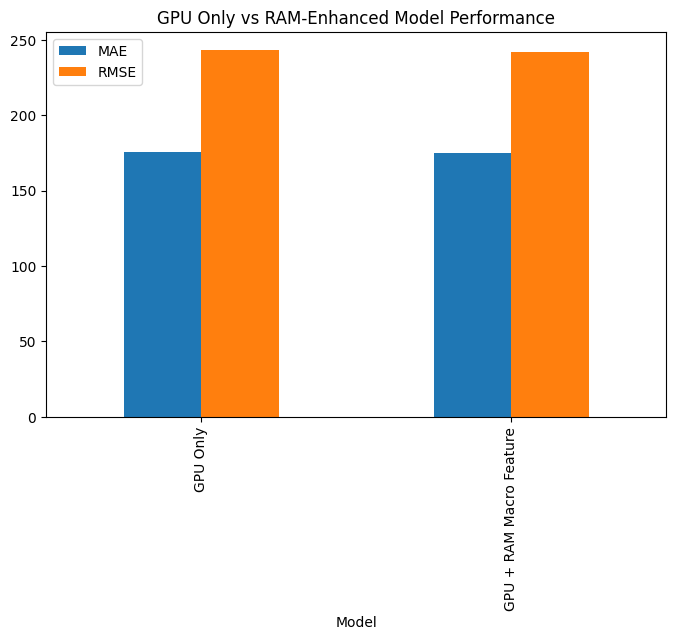

In [68]:
compare_df.set_index("Model")[["MAE", "RMSE"]].plot(
    kind="bar",
    figsize=(8,5),
    title="GPU Only vs RAM-Enhanced Model Performance"
)

Hasil evaluasi menunjukkan bahwa penambahan feature macro harga RAM memberikan peningkatan performa tetapi dengan nilai yang sangat kecil dibandingkan model yang hanya menggunakan spesifikasi GPU. Model GPU + RAM Macro menghasilkan MAE dan RMSE yang sedikit lebih rendah. MAE dengan perbandingan nilai (149.660438 vs 150.673889), dan RMSE dengan perbandingan nilai(202.900314 vs 203.401801), serta peningkatan R² yang sangat kecil yaitu (0.733110 vs 0.731789).

Perbedaan performa yang minimal ini mengindikasikan bahwa harga GPU masih didominasi oleh spesifikasi internal dan performa teknis, sementara faktor makro seperti harga RAM hanya memberikan kontribusi tambahan yang terbatas. Hal ini sejalan dengan hasil feature importance sebelumnya, di mana fitur makro memiliki pengaruh yang jauh lebih kecil dibandingkan fitur teknis GPU.

Meskipun dampaknya kecil, penambahan fitur RAM tidak menurunkan performa model dan memberikan peningkatan yang konsisten pada seluruh metrics (MAE, RMSE, R2). Hal ini menunjukkan bahwa informasi makro dapat berperan sebagai contextual feature, namun bukan penentu utama dalam prediksi harga GPU.

# 9. GPU Price Prediction

Bagian ini menyediakan demo yang memungkinkan anda untuk memasukkan spesifikasi GPU secara manual, seperti tahun rilis, kapasitas VRAM, konsumsi daya, dan skor performa 3DMARK. Model Random Forest terbaik kemudian digunakan untuk memprediksi harga retail GPU berdasarkan input tersebut. Demo ini bertujuan untuk menunjukkan bagaimana model dapat diaplikasikan secara praktis dalam skenario nyata serta mempermudah interpretasi hasil prediksi.

In [69]:
print("PREDICT YOUR OWN GPU PRICE DEMO")
print("===============================")

year = int(input("Enter GPU release year (e.g. 2015): "))
vram = float(input("Enter VRAM (GB) (e.g. 4): "))
wattage = float(input("Enter Wattage (W) (e.g. 160): "))
score = float(input("Enter 3DMARK score (e.g. 15000): "))

gpu_input = np.array([[year, vram, wattage, score]])

predicted_price = best_rf.predict(gpu_input)[0]

print("\nPredicted GPU Retail Price:")
print(f"≈ ${predicted_price:,.2f} USD")

PREDICT YOUR OWN GPU PRICE DEMO

Predicted GPU Retail Price:
≈ $228.84 USD


c:\Users\Marcell\anaconda3\envs\deep_learning\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# 10. Conclusion

Pada hasil prediksi ini, telah dibangun model machine learning untuk memprediksi harga retail GPU berdasarkan spesifikasi teknis, yaitu tahun rilis (year), VRAM, wattage, dan skor performa (3DMARK). Hasil Exploratory Data Analysis (EDA) menunjukkan bahwa harga GPU sangat dipengaruhi oleh performa dan karakteristik teknis internal, dengan hubungan yang tidak sepenuhnya linear. Oleh karena itu, digunakan dua pendekatan pemodelan, yaitu Linear Regression sebagai baseline dan Random Forest sebagai model utama.

Hasil evaluasi menunjukkan bahwa Random Forest memberikan performa yang lebih baik dibandingkan model baseline, terutama dalam menangani hubungan non-linear dan variasi harga pada GPU kelas high-end. Penambahan fitur makro berupa harga RAM memberikan peningkatan performa yang konsisten namun sangat kecil, yang menunjukkan bahwa harga GPU masih didominasi oleh spesifikasi internal, sementara faktor makro berperan sebagai konteks tambahan. Secara keseluruhan, model yang dibangun mampu memberikan prediksi yang cukup akurat dan stabil serta memberikan insight mengenai faktor-faktor utama penentu harga GPU.

Meskipun kontribusi fitur RAM terhadap performa ini tidak begitu berpengaruh, fenomena ini tetap relevan untuk diamati mengingat dinamika industri komponen PC yang terus berubah. Pergeseran fokus produsen komponen menuju segmen AI dan Enterprise berpotensi memengaruhi harga pasar konsumen di masa depan. Oleh karena itu, penggunaan fitur makro dapat dipandang sebagai eksplorasi awal terhadap pengaruh faktor eksternal, bukan sebagai penentu utama dalam prediksi harga GPU saat ini.

# 11. Future Works

Untuk pengembangan lebih lanjut, terdapat beberapa arah penelitian yang dapat dilakukan. Pertama, penggunaan data dengan granularitas waktu yang lebih tinggi (misalnya bulanan atau kuartalan) dapat membantu menangkap perubahan harga pasar dengan lebih baik.

Kedua, eksplorasi model time-series atau forecasting dapat dilakukan apabila data historis yang lebih lengkap, sehingga prediksi harga masa depan dapat divalidasi secara kuantitatif.

Ketiga, penambahan fitur makro lain, seperti data produksi semikonduktor, inflasi, atau permintaan AI/data center, berpotensi meningkatkan pemahaman terhadap pengaruh faktor eksternal terhadap harga GPU.

Terakhir, model dapat dikembangkan lebih lanjut ke dalam bentuk website yang interaktif agar dapat digunakan langsung oleh pengguna untuk melakukan estimasi harga GPU secara praktis.